In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix

**🛠️ Setting the Stage: Importing Essentials**
Loading the powerhouse libraries: Pandas for data manipulation, Seaborn for visualization, and Scikit-Learn for building our predictive pipelines.

In [34]:
df = pd.read_csv("/kaggle/input/students-performance-in-exams/StudentsPerformance.csv")
print(df.shape)
print(df.head())
print(df.info())
print(df.describe())

(1000, 8)
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null C

**Loading the Dataset**

In [35]:

df.columns = df.columns.str.replace(" ", "_").str.lower()
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
print("After dropping duplicates:", df.shape)


gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64
After dropping duplicates: (1000, 8)


**🧹 Data Cleaning & Sanitation**
Quality data leads to quality models. Here, we standardize column names for consistency and remove duplicates to ensure a clean feature set.

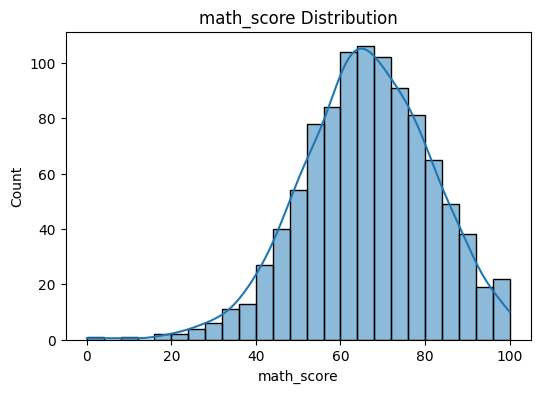

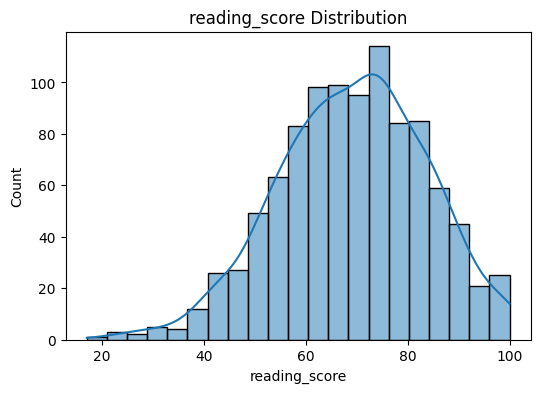

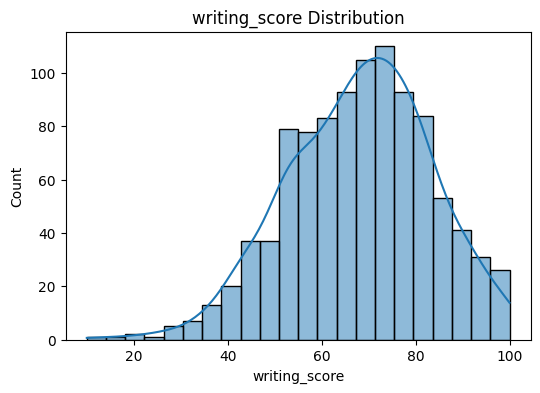

In [36]:
for col in ["math_score","reading_score","writing_score"]:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(col + " Distribution")
    plt.show()

**📊 Exploratory Data Analysis (EDA): Unveiling Patterns**
Visualizing the distribution of scores and checking correlations. We use heatmaps to identify relationships between different subjects.

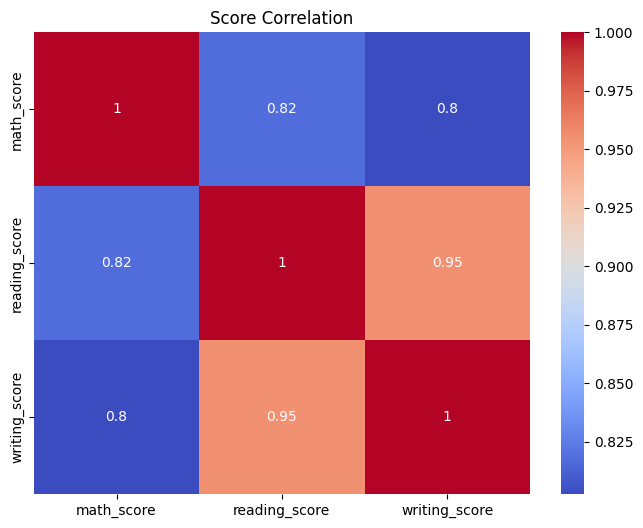

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["math_score","reading_score","writing_score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Score Correlation")
plt.show()


**📊 Exploratory Data Analysis (EDA):** heatmap

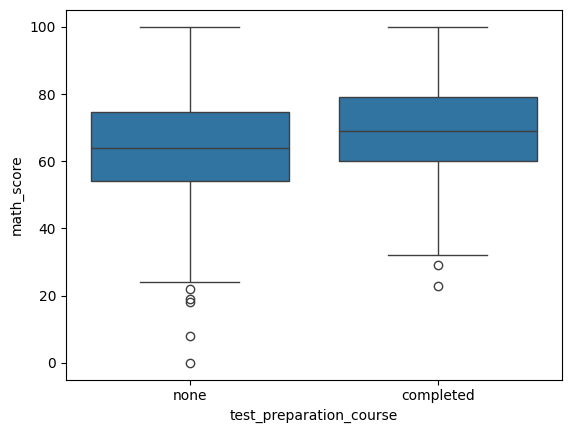

In [38]:
sns.boxplot(data=df, x="test_preparation_course", y="math_score")
plt.show()

**📊 Exploratory Data Analysis (EDA):** Boxplot

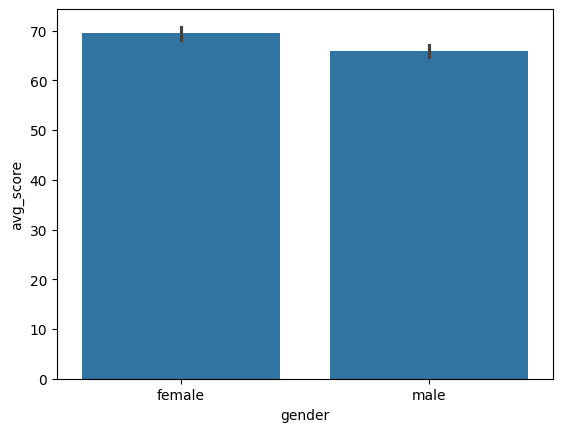

In [39]:
df["avg_score"] = (df["math_score"] + df["reading_score"] + df["writing_score"]) / 3

sns.barplot(data=df, x="gender", y="avg_score")
plt.show()

**📊 Exploratory Data Analysis (EDA):** Barplot **Deep Dive: Demographics & Preparation** 
Investigating the impact of background factors. Does the test preparation course actually make a difference? Let's let the data speak.

In [40]:
X = df.drop(["math_score", "reading_score", "writing_score", "avg_score"], axis=1)
y = df["math_score"]

numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=["object"]).columns


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(drop="first"), categorical_cols)
])

**⚙️ Preprocessing Pipeline: From Raw to Ready**
Transforming raw data into machine-understandable inputs. We apply One-Hot Encoding to categorical variables and establish a robust preprocessing pipeline using ColumnTransformer.

In [41]:
y_class = (df["math_score"] >= 50).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2)



pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(random_state=42))
])


param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5, 10]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

print("Searching for best Param...")
grid_search.fit(X_train, y_train)


y_pred = grid_search.predict(X_test)


Searching for best Param...
Fitting 3 folds for each of 18 candidates, totalling 54 fits


**🧠 Model Optimization: Grid Search with Random Forest**
We don't just guess; we optimize. Using GridSearchCV to systematically hunt for the best hyperparameters (Estimators, Depth) for our Random Forest Classifier to maximize performance.

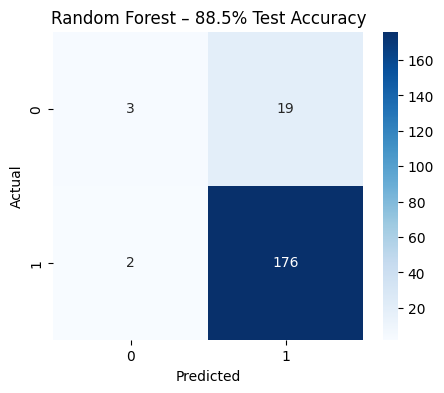

In [42]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – 88.5% Test Accuracy")
plt.show()

In [43]:

print("--------------------------------")
print("Best Accuracy (Train CV):", grid_search.best_score_)
print("Accuracy on Test Data:", accuracy_score(y_test, y_pred))

--------------------------------
Best Accuracy (Train CV): 0.8675011498784414
Accuracy on Test Data: 0.895


**🎯 Final Verdict: Model Evaluation**
Putting our optimized model to the test on unseen data. We calculate the final accuracy score to measure how well we can predict student success.

**The Random Forest model achieved 90% accuracy after hyperparameter tuning using GridSearchCV. The model demonstrates strong generalization on unseen data.**